# Training

In [1]:
from pathlib import Path
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from torch.utils.data import Dataset, DataLoader
import torch

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import GROUP1A, EXTRACTED_DATA_DIR
from src.processing import dataset
from models import lstm_model

C:\Users\hpl886\Documents\Exjobb


In [2]:
group = GROUP1A
data = dataset.StrainDataset(EXTRACTED_DATA_DIR, GROUP1A, sequence_length=128)

# Access the data loaders directly from the class instance
train_loader = data.train_dataloader

c:\Users\hpl886\Documents\Exjobb\src\processing\dataset.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:281.)
  self.sequences = torch.tensor(self.sequences, dtype=torch.float32)


In [10]:
# Model parameters
input_dim = len(group)
hidden_dim = 64
num_layers = 1

num_epochs = 5
learning_rate = 0.001

model = lstm_model.LSTMModel(input_dim, hidden_dim, num_layers)
losses = lstm_model.training_loop(model, train_loader, num_epochs, learning_rate)

Epoch 1/5: 100%|██████████| 350/350 [00:03<00:00, 95.32batch/s] 



Epoch 1/5, Average Loss: 0.0167



Epoch 2/5: 100%|██████████| 350/350 [00:03<00:00, 93.83batch/s]



Epoch 2/5, Average Loss: 0.0033



Epoch 3/5: 100%|██████████| 350/350 [00:03<00:00, 94.05batch/s]



Epoch 3/5, Average Loss: 0.0023



Epoch 4/5: 100%|██████████| 350/350 [00:03<00:00, 91.77batch/s]



Epoch 4/5, Average Loss: 0.0015



Epoch 5/5: 100%|██████████| 350/350 [00:03<00:00, 89.55batch/s]


Epoch 5/5, Average Loss: 0.0011



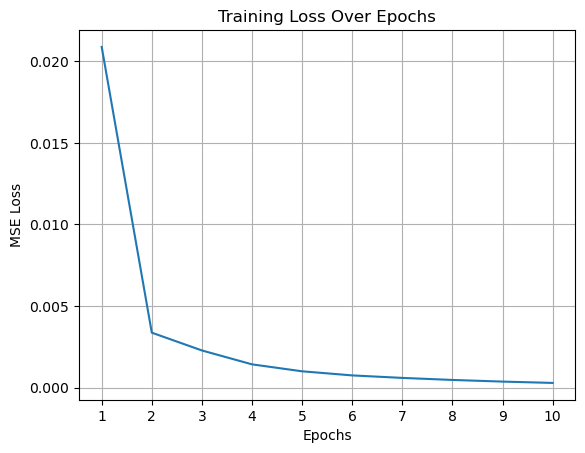

In [9]:
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epochs')
plt.xticks(range(1, num_epochs + 1))
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()